In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('model_evaluation/style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
import pickle

In [2]:
filename = 'model_evaluation/my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


In [3]:
x_col = 'YEAR'
testing_data = pd.read_csv('model_evaluation/test_dataset.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['NSW_total'])

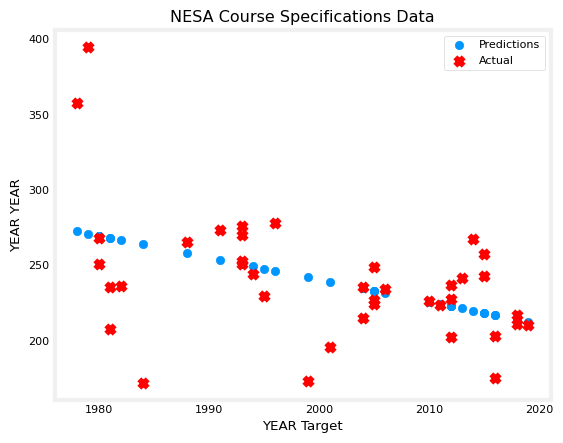

In [4]:
# Define the degree for polynomial features
degree = 2  # You can try different degrees
# Ridge regression with cross-validation for model_A
alphas = np.logspace(-6, 6, 13)
model_A_pipeline = make_pipeline(PolynomialFeatures(degree, include_bias=False), RidgeCV(alphas=alphas))
model_A_pipeline.fit(x_test, y_test)
y_pred = model_A_pipeline.predict(x_test)
plt.scatter(x_test, y_pred, label='Predictions')
plt.scatter(x_test, y_test, marker='x', c='r', label='Actual')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'YEAR {x_col}')
plt.xlabel(f'YEAR Target')
plt.legend()
plt.show()

In [5]:
test_score = model_A_pipeline.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.206870839539528
